In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Price.csv')
df_comp=df.copy()
df.date=pd.to_datetime(df.date,dayfirst=True)
df.set_index('date',inplace=True)

NameError: ignored

In [ ]:
df=df.resample('B').mean()

In [ ]:
df.spx=df.spx.fillna(method='ffill')

df=df.fillna(method='bfill')

In [ ]:
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [ ]:
df

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


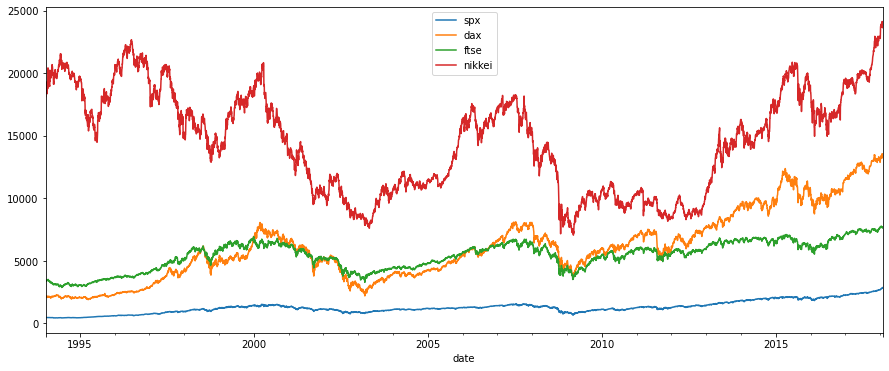

In [ ]:
df.plot(figsize=(15,6))

plt.show()

In [ ]:
import statsmodels.tsa.stattools as sts

In [ ]:
sts.adfuller(df.ftse)

(-1.598833621962054,
 0.4841793579044596,
 6,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 68477.33735716512)

In [ ]:
import statsmodels.graphics.tsaplots as sgt

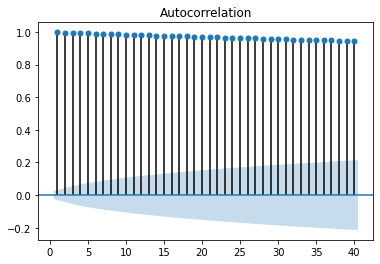

In [ ]:
sgt.plot_acf(df.ftse,lags=40,zero=False)

plt.show()

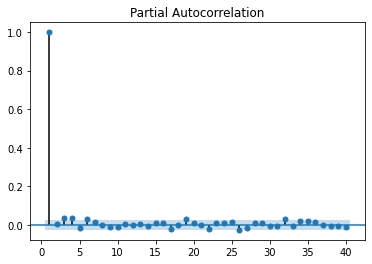

In [ ]:
sgt.plot_pacf(df.ftse,lags=40,zero=False)

plt.show()

In [ ]:
def difference(dataset,step=1):
  diff=list()
  for i in range(step,len(dataset)):
    value=dataset[i]-dataset[i-step]
    diff.append(value)
  return diff

In [ ]:
ftse_diff=difference(df.ftse)

In [ ]:
df=df.iloc[1:,:]

In [ ]:
df['ftse_diff'] = ftse_diff

<ipython-input-21-2d90466bd279>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ftse_diff'] = ftse_diff


In [ ]:
df

,spx,dax,ftse,nikkei,ftse_diff
date,,,,,
1994-01-10,475.270000,2225.00,3440.580000,18443.44,-5.400000
1994-01-11,474.130000,2228.10,3413.770000,18485.25,-26.810000
1994-01-12,474.170000,2182.06,3372.020000,18793.88,-41.750000
1994-01-13,472.470000,2142.37,3360.010000,18577.26,-12.010000
1994-01-14,474.910000,2151.05,3400.560000,18973.70,40.550000
...,...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15,16.386240
2018-01-24,2837.544008,13414.74,7643.428966,23940.78,-88.398808
2018-01-25,2839.253031,13298.36,7615.839954,23669.49,-27.589012


In [ ]:
sts.adfuller(ftse_diff)

(-35.59973234219259,
 0.0,
 5,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 68468.13611640701)

In [ ]:
#method 2:moving average

def difference(dataset):
    mg=list()
    
    for i in range(2,len(dataset)):
        
        m=(dataset[i]+dataset[i-1]+dataset[i-2])/3
              
             
        mg.append((dataset[i]-m))
        
    return mg

In [ ]:
#train test split

size = int(len(df)*0.8)

train_data = df.iloc[:size,:]

test_data = df.iloc[size:,:]


In [ ]:
print(train_data.shape)
print(test_data.shape)

(5020, 5)
(1256, 5)


In [ ]:
import statsmodels.api as sm

In [ ]:
model_ar = sm.tsa.arima.ARIMA(train_data.ftse_diff,order=(1,0,0))

result_ar=model_ar.fit()
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              ftse_diff   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -27614.899
Date:                Thu, 09 Feb 2023   AIC                          55235.798
Time:                        15:41:20   BIC                          55255.361
Sample:                    01-10-1994   HQIC                         55242.653
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5585      0.836      0.668      0.504      -1.079       2.196
ar.L1         -0.0180      0.010     -1.834      0.067      -0.037       0.001
sigma2      3513.1623     40.890     85.918      0.000    3433.020    3593.305
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3326.99
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar2 = sm.tsa.arima.ARIMA(train_data.ftse_diff,order=(2,0,0))

result_ar2=model_ar2.fit()
result_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              ftse_diff   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -27608.453
Date:                Thu, 09 Feb 2023   AIC                          55224.907
Time:                        15:49:03   BIC                          55250.991
Sample:                    01-10-1994   HQIC                         55234.047
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5585      0.804      0.695      0.487      -1.018       2.135
ar.L1         -0.0190      0.010     -1.912      0.056      -0.038       0.000
ar.L2         -0.0506      0.009     -5.551      0.000      -0.069      -0.033
sigma2      3504.6957     40.876     85.740      0.000    3424.580    3584.811
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              3334.30
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.91   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar3 = sm.tsa.arima.ARIMA(train_data.ftse_diff,order=(3,0,0))

result_ar3=model_ar3.fit()
result_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              ftse_diff   No. Observations:                 5020
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -27595.886
Date:                Thu, 09 Feb 2023   AIC                          55201.773
Time:                        15:58:53   BIC                          55234.379
Sample:                    01-10-1994   HQIC                         55213.198
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5585      0.762      0.733      0.463      -0.934       2.051
ar.L1         -0.0225      0.010     -2.250      0.024      -0.042      -0.003
ar.L2         -0.0520      0.009     -5.728      0.000      -0.070      -0.034
ar.L3         -0.0707      0.009     -7.762      0.000      -0.089      -0.053
sigma2      3487.5076     41.997     83.041      0.000    3405.194    3569.821
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3088.35
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.91   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar4 = sm.tsa.arima.ARIMA(train_data.ftse_diff,order=(4,0,0))

result_ar4=model_ar4.fit()
result_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              ftse_diff   No. Observations:                 5020
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27594.053
Date:                Thu, 09 Feb 2023   AIC                          55200.106
Time:                        16:00:32   BIC                          55239.233
Sample:                    01-10-1994   HQIC                         55213.816
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5585      0.786      0.710      0.477      -0.982       2.099
ar.L1         -0.0206      0.010     -2.055      0.040      -0.040      -0.001
ar.L2         -0.0506      0.009     -5.546      0.000      -0.068      -0.033
ar.L3         -0.0701      0.009     -7.688      0.000      -0.088      -0.052
ar.L4          0.0270      0.009      3.007      0.003       0.009       0.045
sigma2      3485.6058     42.310     82.382      0.000    3402.679    3568.533
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3014.08
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar5 = sm.tsa.arima.ARIMA(train_data.ftse_diff,order=(5,0,0))

result_ar5=model_ar5.fit()
result_ar5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              ftse_diff   No. Observations:                 5020
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -27589.995
Date:                Thu, 09 Feb 2023   AIC                          55193.991
Time:                        16:01:43   BIC                          55239.639
Sample:                    01-10-1994   HQIC                         55209.986
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5585      0.760      0.735      0.463      -0.932       2.049
ar.L1         -0.0196      0.010     -1.936      0.053      -0.039       0.000
ar.L2         -0.0534      0.009     -5.816      0.000      -0.071      -0.035
ar.L3         -0.0721      0.009     -7.938      0.000      -0.090      -0.054
ar.L4          0.0262      0.009      2.902      0.004       0.009       0.044
ar.L5         -0.0402      0.009     -4.479      0.000      -0.058      -0.023
sigma2      3480.4086     42.218     82.438      0.000    3397.662    3563.155
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3034.51
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARMA model 

In [ ]:
model_arma31 = sm.tsa.arima.ARIMA(train_data.ftse_diff,order=(3,0,1))

result_arma31=model_arma31.fit()
result_arma31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              ftse_diff   No. Observations:                 5020
Model:                 ARIMA(3, 0, 1)   Log Likelihood              -27593.140
Date:                Thu, 09 Feb 2023   AIC                          55198.280
Time:                        16:37:35   BIC                          55237.407
Sample:                    01-10-1994   HQIC                         55211.990
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5596      0.775      0.722      0.470      -0.958       2.078
ar.L1         -0.4081      0.095     -4.284      0.000      -0.595      -0.221
ar.L2         -0.0594      0.010     -5.764      0.000      -0.080      -0.039
ar.L3         -0.0915      0.009     -9.664      0.000      -0.110      -0.073
ma.L1          0.3878      0.096      4.040      0.000       0.200       0.576
sigma2      3487.5866     42.329     82.392      0.000    3404.623    3570.550
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3011.08
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_arma32 = sm.tsa.arima.ARIMA(train_data.ftse_diff,order=(3,0,2))

result_arma32=model_arma32.fit()
result_arma32.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              ftse_diff   No. Observations:                 5020
Model:                 ARIMA(3, 0, 2)   Log Likelihood              -27591.921
Date:                Thu, 09 Feb 2023   AIC                          55197.842
Time:                        16:38:54   BIC                          55243.490
Sample:                    01-10-1994   HQIC                         55213.838
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5618      0.795      0.707      0.480      -0.996       2.119
ar.L1         -0.5666      0.080     -7.099      0.000      -0.723      -0.410
ar.L2         -0.4406      0.088     -5.002      0.000      -0.613      -0.268
ar.L3         -0.0938      0.010     -9.411      0.000      -0.113      -0.074
ma.L1          0.5483      0.080      6.818      0.000       0.391       0.706
ma.L2          0.3844      0.089      4.328      0.000       0.210       0.558
sigma2      3483.3519     42.358     82.235      0.000    3400.331    3566.373
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2997.55
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# invert differenced value
def inverse_difference(df_test, df_pred, interval=1):
	return df_pred + df_test[-interval]

In [ ]:
#optimize model : arma(3,2)

resid=result_arma32.resid

In [ ]:
re=pd.DataFrame(resid)

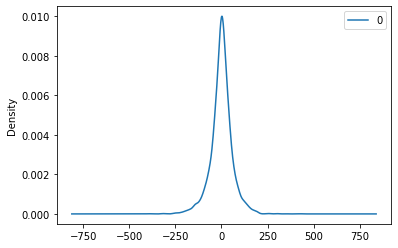

In [ ]:
re.plot(kind='kde')

plt.show()

In [ ]:
model_arma33 = sm.tsa.arima.ARIMA(train_data.ftse_diff,order=(3,0,3))

result_arma33=model_arma33.fit()
result_arma33.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              ftse_diff   No. Observations:                 5020
Model:                 ARIMA(3, 0, 3)   Log Likelihood              -27588.091
Date:                Thu, 09 Feb 2023   AIC                          55192.183
Time:                        16:39:47   BIC                          55244.352
Sample:                    01-10-1994   HQIC                         55210.464
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5611      0.754      0.744      0.457      -0.916       2.038
ar.L1         -0.1734      0.086     -2.021      0.043      -0.342      -0.005
ar.L2         -0.2424      0.074     -3.270      0.001      -0.388      -0.097
ar.L3          0.4033      0.081      5.007      0.000       0.245       0.561
ma.L1          0.1550      0.081      1.904      0.057      -0.005       0.315
ma.L2          0.1821      0.072      2.543      0.011       0.042       0.322
ma.L3         -0.4898      0.076     -6.459      0.000      -0.638      -0.341
sigma2      3481.0317     42.498     81.911      0.000    3397.738    3564.326
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              3115.20
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARIMA

In [ ]:
model_arima32 = sm.tsa.arima.ARIMA(train_data.ftse,order=(3,1,2))

result_arima32=model_arima32.fit()
result_arima32.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5020
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -27587.161
Date:                Thu, 09 Feb 2023   AIC                          55186.323
Time:                        16:46:59   BIC                          55225.448
Sample:                    01-10-1994   HQIC                         55200.033
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5674      0.080     -7.130      0.000      -0.723      -0.411
ar.L2         -0.4416      0.088     -5.030      0.000      -0.614      -0.270
ar.L3         -0.0938      0.010     -9.540      0.000      -0.113      -0.075
ma.L1          0.5491      0.080      6.860      0.000       0.392       0.706
ma.L2          0.3854      0.088      4.362      0.000       0.212       0.559
sigma2      3484.5738     42.019     82.929      0.000    3402.218    3566.929
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2995.39
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
resid32=result_arima32.resid

In [ ]:
re32=pd.DataFrame(resid32)

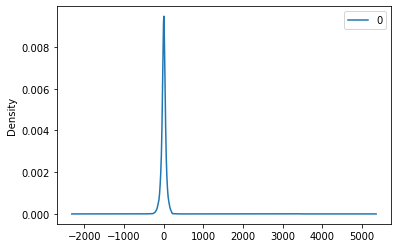

In [ ]:
re32.plot(kind='kde')

plt.show()

Evaluation

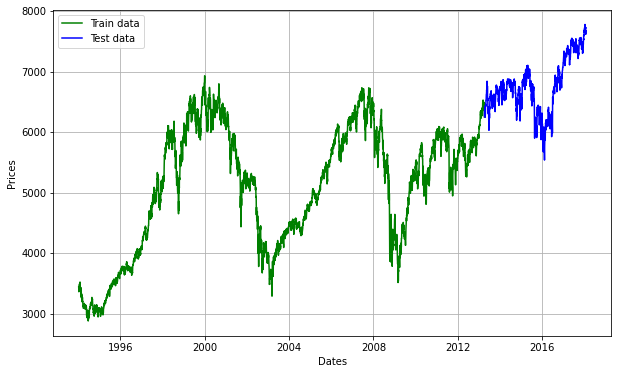

In [ ]:
plt.figure(figsize=(10,6))

plt.grid(True)

plt.xlabel('Dates')

plt.ylabel('Prices')

plt.plot(train_data.ftse,'green',label='Train data')


plt.plot(test_data.ftse,'blue',label='Test data')

plt.legend()

plt.show()

In [ ]:
test_data.ftse

date
2013-04-08    6276.940000
2013-04-09    6313.200000
2013-04-10    6387.370000
2013-04-11    6416.140000
2013-04-12    6384.390000
                 ...     
2018-01-23    7731.827774
2018-01-24    7643.428966
2018-01-25    7615.839954
2018-01-26    7665.541292
2018-01-29    7671.533300
Freq: B, Name: ftse, Length: 1256, dtype: float64

In [ ]:
start = '2013-04-08'
end = '2018-01-29'

In [ ]:
df_pred = result_arima32.predict(start=start,end=end)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [ ]:
df_pred.head(20)

2013-04-08    6262.333335
2013-04-09    6270.822642
2013-04-10    6274.041370
2013-04-11    6276.425954
2013-04-12    6278.612973
2013-04-15    6278.932853
2013-04-16    6279.296650
2013-04-17    6280.028150
2013-04-18    6279.938491
2013-04-19    6279.921578
2013-04-22    6280.238517
2013-04-23    6280.150982
2013-04-24    6280.082528
2013-04-25    6280.242466
2013-04-26    6280.195985
2013-04-29    6280.137917
2013-04-30    6280.223334
2013-05-01    6280.203851
2013-05-02    6280.163308
2013-05-03    6280.209305
Freq: B, Name: predicted_mean, dtype: float64

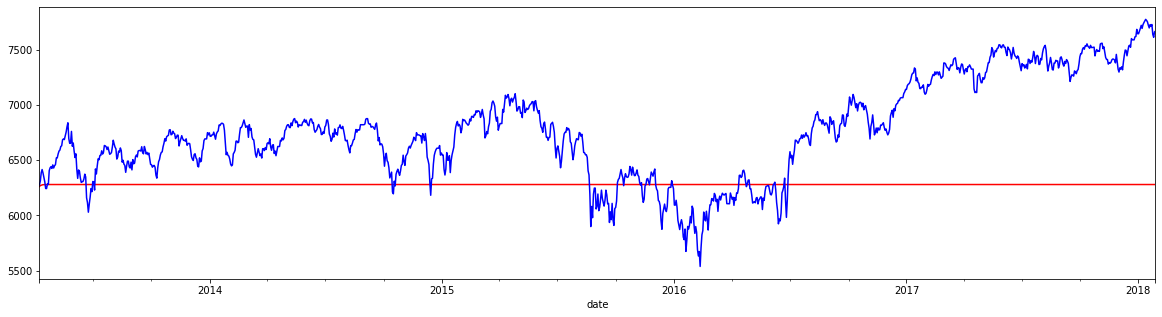

In [ ]:
plt.grid(True)

df_pred.plot(figsize=(20,5),c='r')

test_data.ftse[start:end].plot(figsize=(20,5),c='b')

plt.show()

In [ ]:
history = [x for x in train_data.ftse_diff]
len(history)

5020

In [ ]:
#predict just one next step

#history = [x for x in df_train.ftse]
predictedARIMA= list()
for t in range(len(test_data.ftse_diff[start:end])): 
   model_ar32= sm.tsa.arima.ARIMA(history, order=(3,1,2))
   result_ar32 = model_ar32.fit()
   #just forecast one record 
   output = result_ar32.forecast()
   
   yhat = output[0]
   predictedARIMA.append(yhat)
   #insert on testdata to train set
   obs = test_data.ftse_diff[t]
   history.append(obs)

In [ ]:
model_arimax=sm.tsa.arima.ARIMA(train_data.ftse,exog=train_data.spx,order=(2,1,1))
result_arimax=model_arimax.fit()
result_arimax.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5020
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -26690.909
Date:                Thu, 09 Feb 2023   AIC                          53391.819
Time:                        17:34:30   BIC                          53424.424
Sample:                    01-10-1994   HQIC                         53403.244
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6989      0.036     75.977      0.000       2.629       2.769
ar.L1          0.4234      0.038     11.077      0.000       0.348       0.498
ar.L2          0.0881      0.016      5.549      0.000       0.057       0.119
ma.L1         -0.7224      0.035    -20.594      0.000      -0.791      -0.654
sigma2      2435.7963     27.475     88.655      0.000    2381.946    2489.647
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4447.97
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                            -0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start='2013-04-08'
end='2014-01-29'

In [ ]:
a = np.array([5])

In [ ]:
a.reshape(1,1)

array([[5]])

In [ ]:
#predict just one next step

history = [x for x in train_data.ftse]

predictedARIMA= list()

exog =[x for x in train_data.spx]

for t in range(len(test_data.ftse[start:end])): 
   model_arimax= sm.tsa.arima.ARIMA(history, order=(2,1,1),exog=exog)
   result_arimax = model_arimax.fit()
   #just forecast one record 
   output = result_arimax.forecast(exog=test_data['spx'][t].reshape(1,1))
   
   yhat = output[0]
   predictedARIMA.append(yhat)
   #insert on testdata to train set
   obs = test_data.ftse[t]
   exog_obs=test_data.spx[t] 

   history.append(obs)
   exog_obs.append(obs)